# Hot Potato: R in Python

**EMAT 22110 - Data in Emerging Media and Technology**

**Author: Terra Kincy**

**Created:** 03 / 11/ 21

**Last updated:** 03/ 16/ 21

Welcome to R in Python for Beginners. Written by a beginner.

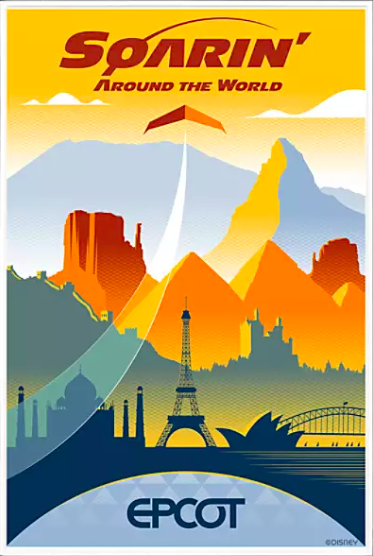

##### Photo obtained from the official Disney merchandise shop https://www.shopdisney.com/

Lets eliminate any potential confusion right away. R and Python are two different coding languages. Using thier simplist definitions, the official R website at https://www.r-project.org/about.html says that "R is a language and environment for statistical computing and graphics." While Python's official website at https://www.python.org/ defines python as "a programming language that lets you work quickly and integrate systems more effectively." Both definitions are pretty vague, but you can use both languages to do a wide variety of things. So, lets use both languages to look at some statistics about Disney Rides. Specifically, the "Soarin': Around the World" ride and the "Spaceship Earth" ride.

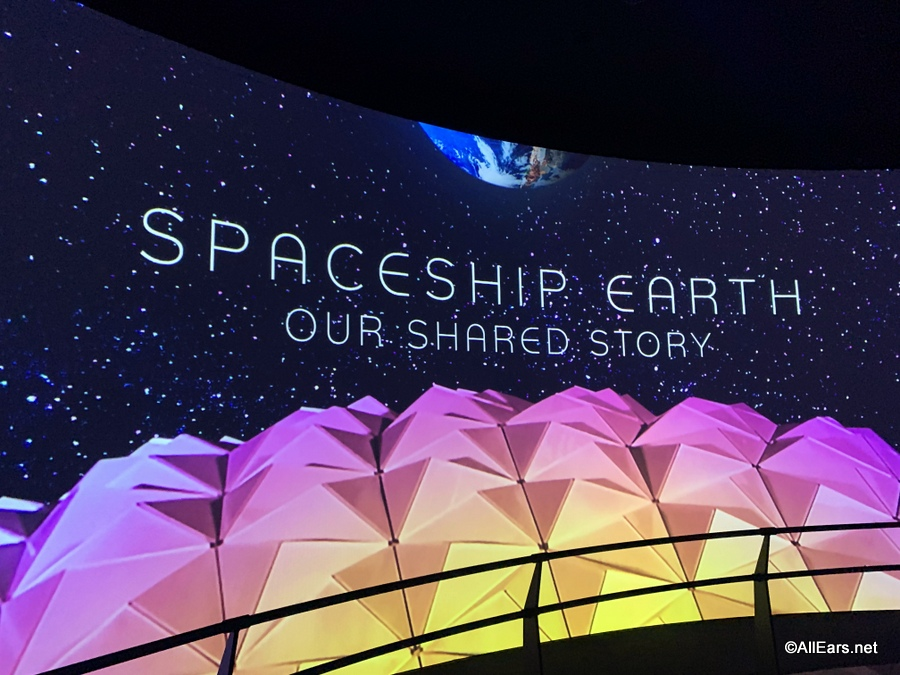

##### Photo obtained from https://allears.net


If R and Python are two different languages, why are we using them both in the same file? Python and R have somehow become rivals amongst one another. Python is more object-oriented, while R is more focused on statistical distributions. However, it can be argued that some things are better done in one program verses the other, since you can use each language to do alot of the same things. "Well, beginner writer who is trying to teach beginners how to use R in Python, this still doesn't explain why we're using them both." I hear you rushing me through the screen. To that I say one word: unification. We don't need to argue over which is better than the other. Instead, we should be expanding our horizons and learning them both. There is nothing wrong with using one or the other to code a specific project. Even better than using one, using them both to not only get your desired results, but to show your future boss that you are all for equality and inclusion! Am I right? I know I am.

So, follow me through this beginners journey through R in Python... Again, written by a beginner. 

## Import the Libraries

The first step within this project is to import the needed libraries. In this instance, we are importing [Panda](https://www.activestate.com/resources/quick-reads/what-is-pandas-in-python-everything-you-need-to-know/#:~:text=Pandas%20is%20an%20open%20source,support%20for%20multi%2Ddimensional%20arrays.), [matplotlib](https://matplotlib.org/#:~:text=Matplotlib%20is%20a%20comprehensive%20library,%2C%20pan%2C%20update...), [numpy](https://www.w3schools.com/python/numpy_intro.asp#:~:text=NumPy%20is%20a%20Python%20library,NumPy%20stands%20for%20Numerical%20Python.), [os](https://www.geeksforgeeks.org/os-module-python-examples/#:~:text=The%20OS%20module%20in%20Python,interact%20with%20the%20file%20system.), [rpy2](https://pypi.org/project/rpy2/#:~:text=rpy2%20is%20running%20an%20embedded,numpy%20and%20pandas%20data%20structures), and of course R.

We already know that R is its own language and seperate from Python. When we use R within python, we have to hand objects back and forth. So, along with importing R, we have to give those R objects Python variables in order to do the process that I like to call: Hot Potato. This is the tossing of Python data to R, and R to Python, and so on.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

In [ ]:
os.environ['R_HOME'] = r"/Users/terra/opt/anaconda3/envs/datainemat/lib/R"
print(os.environ['R_HOME'])

In [1]:
import rpy2
print(rpy2.__version__)

3.4.2


In [2]:
import rpy2.robjects as robjects

In [3]:
r_cor = robjects.r["cor"]
r_lm = robjects.r["lm"]
r_predict = robjects.r["predict"]
r_plot = robjects.r["plot"]
r_summary = robjects.r["summary"]

## Load in the Data

In [ ]:
waits = pd.read_csv(r"/Users/terra/Downloads/SpringSemester/EMAT/Assisngments/RRecess/disney_wait_times.csv")
waits.head()

After loading in our csv data file, we want to plot the univariate distributions to see if there are any odd errors.

The statistics that we will focus on with the Soarin' and Spaceship Earth disney ride are the wait time statistics. This is the average times that people usually have to wait before getting access to these ride.

In [ ]:
soarin_hist = plt.hist(waits['soarin_wait'])

When we plot the graph of wait times for the Soarin' ride, we see that the range of the wait times for soaring ride seem to be as short as 10 minutes and as long as 140 minutes.

In the wait time table, we see values of -999 under the Spaceship ride. How can there be a negative wait time? Actually, this is not a negative wait time. It is an indication of missing or incorrect information. So, to remove these values, and avoid confusion in the visual data, we will replace the -999 values with nan. Nan is *not* zero, it is an empty/missing element, meaning that is simply does not exist. If we plot the graph before removing the negative values, it will undoubtedly look incorrect. Plotting the graph after removing the negative values will show a graph with no errors that is more comparable to the Soarin' graph.

In [ ]:
waits = waits.replace(-999.0, np.nan)

In [ ]:
spaceship_hist = plt.hist(waits['spaceship_wait'])

This graph shows that the wait times for the spaceship ride are zero to 75 minutes.

As mentioned before, we have to play hot potato with R and Python. We have our graph plotted in Python, so now we need to make sure R understands that data. The Python data can't be passed directly through R because the two languages are structured differently. This is where we use something called a float vector from the R library. Passing the data through float vectors doesnt change the data in anyway, but it converts it from data that is readable in Python to data that is readable in R.

In [ ]:
soarin_r = robjects.FloatVector(waits['soarin_wait'])
spaceship_r = robjects.FloatVector(waits['spaceship_wait'])

Now, we want to take the first variable (soarin_wait) and the second variable (spaceship_wait) and find the degree to which those two things are similar. This is much like preforming a [T-Test](https://www.statisticshowto.com/probability-and-statistics/t-test/); however, we will be using the [correlation (cor)](http://www.sthda.com/english/wiki/correlation-test-between-two-variables-in-r#:~:text=R%20functions,-Correlation%20coefficient%20can&text=cor()%20computes%20the%20correlation,%2Dvalue) funtion within R. Cor is differing from the T-Test in that it needs a complete data set to run the calculation. This is what the last parameter of the code below is doing

In [ ]:
wait_cor = r_cor(soarin_r, spaceship_r, method = "pearson", use = "pairwise.complete.obs")

In [ ]:
wait_cor[0]

In [ ]:
wait_cor[0] ** 2

Using the cor function within R results in us obtaining the Pearson R value: the degree to which two things are associated. An easier way to interpret the Pearson R value is to square it and turn it into a percentage, which leads to finding the proportion of the total varients. Confusing business, I know. But lets break this down. An R squared value will always fall between the ranges of zero and one. Zero means there is no association between the two variables, while an R squared value of one means the variables have perfect correlation. Of course to make this into a percentage we want to multiply this by 100 and this is where we see that there are 13% of the varients in wait times.

##  Correlation Coefficients

We already talked about the Pearson R value, which is just another term for the correlation coefficients. We will get more into that, but first lets look at the [linear model (lm)](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm) funciton in R. This function accepts a few things as parameters, but we will be focusing on formula. We will use formula to specify how we want the math arranged for our regression model. So the next line of code is saying that whatever is on the left will be the outcome variable (dependant variable), and whatever is on the right is the independant variable. Basically, we can use this formula to predict the values of wait times for Soarin' by the values of wait times for Spaceship Earth. 


So, after creating our formula, soarin by spaceship, we will give the formula values. To do this, we will use R environments. So, when we say soarin we mean the soarin_r variable we created before, and when we say spaceship we mean the spaceship_r variable we created before.

***Formulas can be much bigger and complex***

In [ ]:
simple_form = robjects.Formula("soarin ~ spaceship")
simple_form.environment['soarin'] = soarin_r
simple_form.environment['spaceship'] = spaceship_r

We can then call our linear model function to call the formula in simple form.

When we display the lm we see a lot of information and it can be overwhelming to see all this information such format, but good news is that you don't need to know every aspect of this. Unless you are specifically focusing on modeling, in that case I can't help you. I'm a beginner trying to teach a beginner. I only know so much, however, I can give a little information about the coefficients within the model. 

In [ ]:
wait_lm = r_lm(formula = simple_form)
type(wait_lm)

In [ ]:
wait_lm

There are two ways to view a flat vector from this model. Both yeild the same results. 

In [ ]:
wait_lm[0]

In [ ]:
wait_lm.rx2("coefficients")

We can see two values in the model. The first value is the y- intercept. If you were anything like me and forgot about this Algebra 2 concept, then I will remind you that the y-intercept is the point on the graph where the line crosses the y axis.

Lets put this into visual context. Looking at this scatter plot, we can see the the linear model determined that the line best for our data (the line that will cross the y axis) should be at 48. So when spaceship = 0, soarin will equal 48. When our independant value equals zero, the y-intercept is the value of our dependant variable.

In [ ]:
fig, ax0 = plt.subplots()
ax0 = plt.scatter(waits['spaceship_wait'], waits['soarin_wait'])
plt.show()

The second value in the linear model flat vector is the increase of the soarin values. For every one digit increase in spaceship, soaring increases by .45. Meaning that when spaceship is equal to 10 on the scatter graph, soarin will be 10 x .45 (4.5) above the spaceship value. This means that the two variables have a positive correlation coefficient.

## Conclusion

This is just the beginning of what R can do in Python. Like we just did, we can use real world senarios to figure out real world issues and topics. There doesn't need to be any comparisons or disagreements on which programming language is better. Instead, we can focus on learning and using them both to get fantastic results. The time of picking and choosing is over. Now, take this information and continue learning how to be a master at the art of hot potato!

If you read this far, you're awesome. Here's a tip for coding to celebrate!


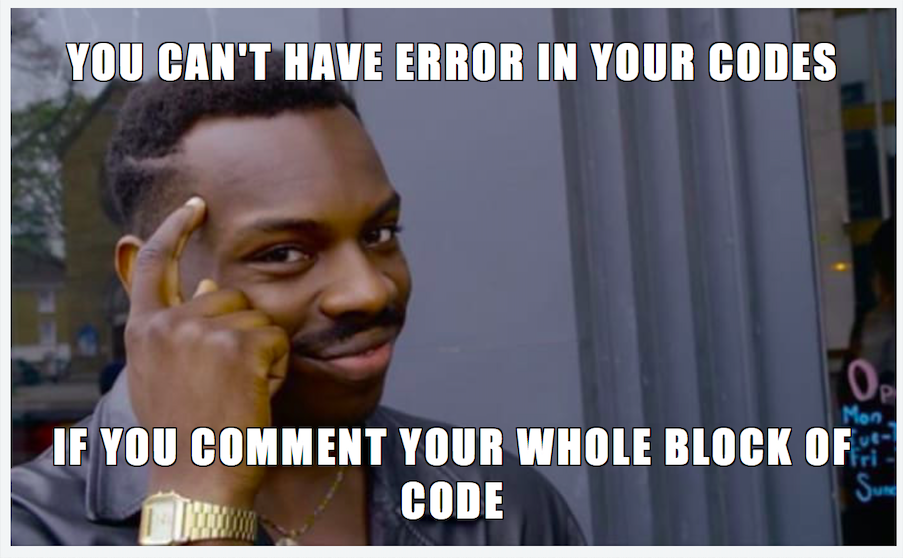
